# Name : Aswin Murali


# Student ID: 201713299

# Libararies Used 

In [1]:
#all the python libraries used in this file 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics.cluster import entropy
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import SVC

# Loading the dataset

In [2]:
#prints the given dataset 
data =pd.read_csv('dataset_assignment1.csv') 
data

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...
695,2,1,1,1,2,1,1,1,1,0
696,5,10,10,3,7,3,8,10,2,1
697,4,8,6,4,3,4,10,6,1,1
698,4,8,8,5,4,5,10,4,1,1


# Data Information

In [3]:
#prints the data information about the given dataset 
print(data.columns)
print(data.index)
print(data.shape)
print(data.info())  

Index(['feature1', 'feature2', 'feature3', 'feature4', 'feature5', 'feature6',
       'feature7', 'feature8', 'feature9', 'class'],
      dtype='object')
RangeIndex(start=0, stop=700, step=1)
(700, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   feature1  700 non-null    int64
 1   feature2  700 non-null    int64
 2   feature3  700 non-null    int64
 3   feature4  700 non-null    int64
 4   feature5  700 non-null    int64
 5   feature6  700 non-null    int64
 6   feature7  700 non-null    int64
 7   feature8  700 non-null    int64
 8   feature9  700 non-null    int64
 9   class     700 non-null    int64
dtypes: int64(10)
memory usage: 54.8 KB
None


# Understanding the dataset

In [4]:
#extracting the features(X) and target variables(Y) from the given dataset 
X = data.drop('class', axis=1)
Y = data['class'] 

# Number of samples for each case in dataset

In [5]:
#indicates the number of samples for each class in the given dataset 
print(data['class'].value_counts()) 

class
0    459
1    241
Name: count, dtype: int64


# Visualizing the given dataset

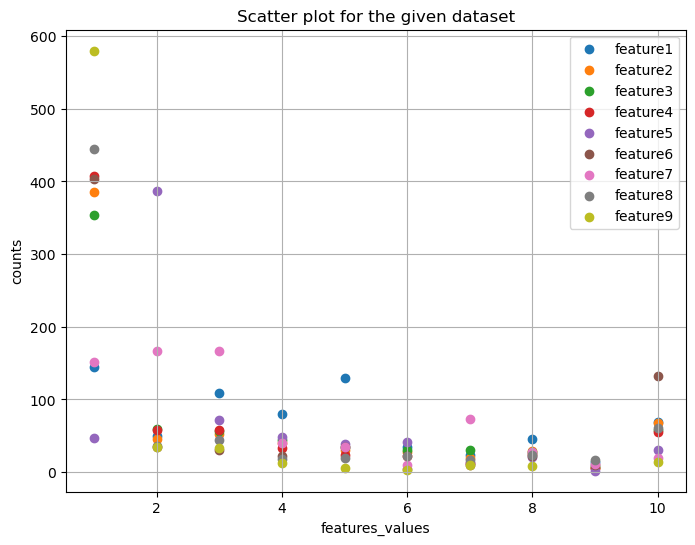

In [6]:
#scatter plot for the given dataset 
plt.figure(figsize=(8,6))
#starts iterating a loop over 'features' column in the given dataset
for feature in X.columns: 
#determines the unique values in 'feature' column using value_counts and sorts them according to their index values
    count = X[feature].value_counts().sort_index()     
    plt.scatter(count.index, count.values, label=feature) #creates a scatter plot
plt.xlabel('features_values')
plt.ylabel('counts') 
plt.title('Scatter plot for the given dataset')
plt.grid()
plt.legend()
plt.show() 

# Statistical Description of features in the dataset

In [7]:
#extracts unique values from column class in dataset 
unique_values = data['class'].unique()
for x in unique_values:
    #creates boolean mask to identify rows in 'class' column that matches with current label x
    cls = data.loc[data['class'].isin([x])] 
    
    #generates statistical summary for all columns in dataset 
    print(cls.describe()) 

         feature1    feature2    feature3    feature4    feature5    feature6  \
count  459.000000  459.000000  459.000000  459.000000  459.000000  459.000000   
mean     2.956427    1.324619    1.442266    1.363834    2.119826    1.437908   
std      1.672490    0.906830    0.996960    0.995886    0.916145    1.310839   
min      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
25%      1.000000    1.000000    1.000000    1.000000    2.000000    1.000000   
50%      3.000000    1.000000    1.000000    1.000000    2.000000    1.000000   
75%      4.000000    1.000000    1.000000    1.000000    2.000000    1.000000   
max      8.000000    9.000000    8.000000   10.000000   10.000000   10.000000   

         feature7    feature8    feature9  class  
count  459.000000  459.000000  459.000000  459.0  
mean     2.102397    1.289760    1.063181    0.0  
std      1.079976    1.057787    0.501456    0.0  
min      1.000000    1.000000    1.000000    0.0  
25%      1.0000

# Spliting the dataset into Training and Testing data

In [8]:
#splits the data into training and test data and stratify is used to make sure the class distribution in similar to the original dataset 
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, train_size=0.8, random_state=24, stratify=Y)  
print(X, Y)

results = {'Classifier:':['Accuracy:','Precision:','Recall:','F1:']}

     feature1  feature2  feature3  feature4  feature5  feature6  feature7  \
0           5         1         1         1         2         1         3   
1           5         4         4         5         7        10         3   
2           3         1         1         1         2         2         3   
3           6         8         8         1         3         4         3   
4           4         1         1         3         2         1         3   
..        ...       ...       ...       ...       ...       ...       ...   
695         2         1         1         1         2         1         1   
696         5        10        10         3         7         3         8   
697         4         8         6         4         3         4        10   
698         4         8         8         5         4         5        10   
699         3         1         1         1         2         1         3   

     feature8  feature9  
0           1         1  
1           2         1

# 1. Decision Trees

Training score: 1.0
Testing score: 0.95


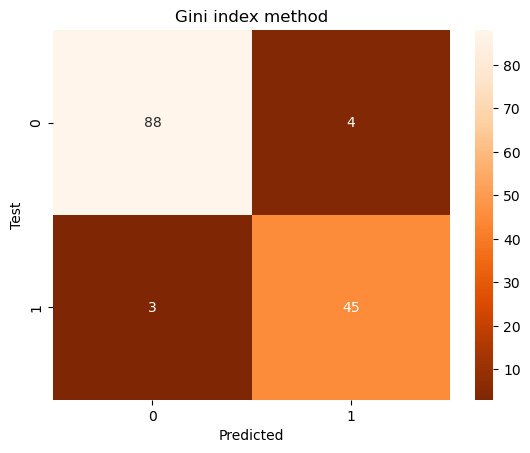

In [12]:
#decision tree classifiers model trains the X_train and Y_train data and use 'gini' criterion to compute leaf impurity
dec_tree_class = DecisionTreeClassifier(criterion = 'gini', splitter = 'best', max_depth = None).fit(X_train, Y_train)

#using formatted string in the print statement to make it effectively readable 
print(f"Training score: {dec_tree_class.score(X_train, Y_train)}")
print(f"Testing score: {dec_tree_class.score(X_test, Y_test)}")

#generates predictions of the model obtained
Y_pred = dec_tree_class.predict(X_test)

#generates heatmap for the confusion matrix 
sns.heatmap(confusion_matrix(Y_test, Y_pred),annot = True, cmap='Oranges_r')
plt.xlabel('Predicted')
plt.ylabel('Test')
plt.title('Gini index method')
plt.show()

Training score: 1.0
Testing score: 0.9428571428571428


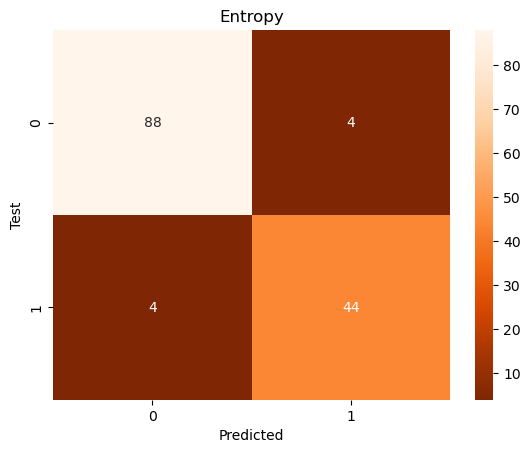

In [13]:
#decision tree classifiers model trains the X_train and Y_train data and use 'entropy' criterion to measure the quality of split 
dec_tree_class = DecisionTreeClassifier(criterion = 'entropy', splitter = 'best', max_depth = None).fit(X_train, Y_train)

#using formatted string in the print statement to make it effectively readable
print(f"Training score: {dec_tree_class.score(X_train, Y_train)}")
print(f"Testing score: {dec_tree_class.score(X_test, Y_test)}")

#generates predictions of the model obtained
Y_pred = dec_tree_class.predict(X_test)

#generates heatmap for the confusion matrix 
sns.heatmap(confusion_matrix(Y_test, Y_pred),annot = True, cmap='Oranges_r') 
plt.xlabel('Predicted')
plt.ylabel('Test')
plt.title('Entropy')
plt.show() 

Training score: 1.0
Testing score: 0.9357142857142857


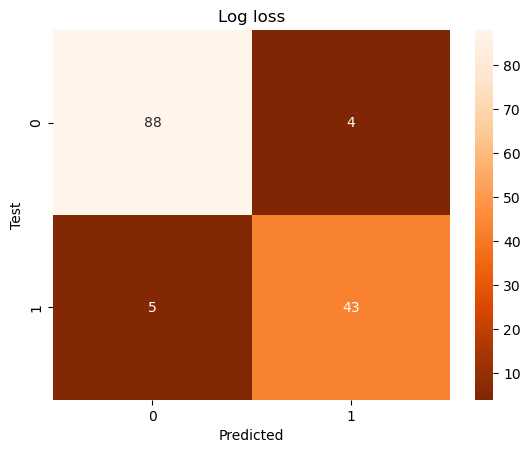

In [14]:
#decision tree classifiers model trains the X_train and Y_train data and use 'log_loss' criterion to measure the quality of split 
dec_tree_class = DecisionTreeClassifier(criterion = 'log_loss', splitter = 'best', max_depth = None).fit(X_train, Y_train)

#using formatted string in the print statement to make it effectively readable
print(f"Training score: {dec_tree_class.score(X_train, Y_train)}")
print(f"Testing score: {dec_tree_class.score(X_test, Y_test)}")

#generates predictions of the model obtained
Y_pred = dec_tree_class.predict(X_test)

#generates heatmap for the confusion matrix 
sns.heatmap(confusion_matrix(Y_test, Y_pred),annot = True, cmap='Oranges_r') 
plt.xlabel('Predicted')
plt.ylabel('Test')
plt.title('Log loss')
plt.show()  

# KFold cross Validation approach

In [15]:
k_fold = KFold(n_splits = 5, shuffle = True)
k_fold.split(X_train)
print(X_train) 

     feature1  feature2  feature3  feature4  feature5  feature6  feature7  \
521         4         1         1         1         3         1         1   
82          5         2         1         1         2         1         3   
319         4         4         4         4         6         5         7   
296         5         3         4         3         4         5         4   
580         5         1         2         1         2         1         2   
..        ...       ...       ...       ...       ...       ...       ...   
228         1         1         1         1         1         1         3   
71          6        10         2         8        10         2         7   
244         1         1         1         1         2         1         3   
426         5         3         6         1         2         1         1   
27          5         1         1         1         2         1         2   

     feature8  feature9  
521         1         1  
82          1         1

Prediction:
 [0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 1 1 1 0
 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0
 1 0 1 0 0 1 1 0 1 1 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 1 0
 1 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0]
Confusion Matrix:
 [[89  3]
 [ 4 44]]
classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.97      0.96        92
           1       0.94      0.92      0.93        48

    accuracy                           0.95       140
   macro avg       0.95      0.94      0.94       140
weighted avg       0.95      0.95      0.95       140

Model Accuracy: 95.0
Precision of model: 93.61702127659575
Recall score of model: 91.66666666666666
f1 score of model: 92.63157894736842


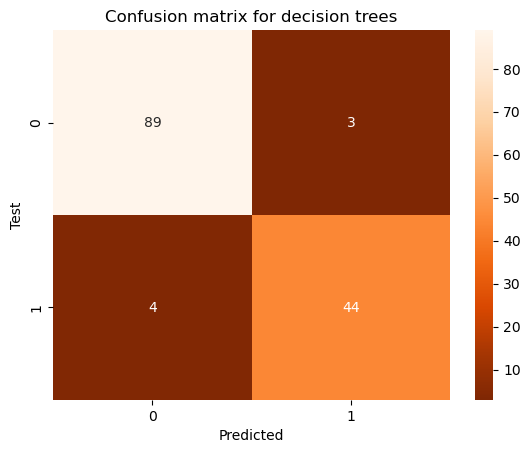

In [16]:
#creating empty list of models accuracy 
model_accuracy = []
for train_index, test_index in k_fold.split(data):
    #Spliting the data into training and testing data
    P_train, P_test = data.iloc[train_index], data.iloc[test_index]
    Q_train, Q_test = Y[train_index], Y[test_index]
    
    #Training the model 
    dt_model = dec_tree_class.fit(P_train, Q_train)
    
    #Appending the model_accuracy to the accuracy of the model 
    model_accuracy.append(accuracy_score(Q_test, dt_model.predict(P_test), normalize = True)*100)

#Decision tree classifier training and prediction 
dec_tree = DecisionTreeClassifier()
dec_tree = dec_tree.fit(X_train, Y_train)
Y_pred = dec_tree.predict(X_test) 

#prediction
print(f"Prediction:\n {Y_pred}")

#confusion matrix
print(f"Confusion Matrix:\n {confusion_matrix(Y_test,Y_pred)}")

#classification Report
cls_rep = classification_report(Y_test, Y_pred)
print(f"classification Report: \n {classification_report(Y_test, Y_pred)}")

#Accuracy of the model 
accuracy = accuracy_score(Y_test, Y_pred)*100
print("Model Accuracy:", accuracy)

#precision of the model
precision = precision_score(Y_test, Y_pred)*100
print("Precision of model:", precision)

#Recall score of the model
recall = recall_score(Y_test, Y_pred)*100
print("Recall score of model:", recall)

#f1 score of the model 
f1 = f1_score(Y_test, Y_pred)*100
print("f1 score of model:", f1)

#plotting confusion matrix for decision tree method
sns.heatmap(confusion_matrix(Y_test,Y_pred),annot=True,cmap='Oranges_r')
plt.xlabel('Predicted')
plt.ylabel('Test')
plt.title('Confusion matrix for decision trees')
plt.show()

results['DT'] = [accuracy, precision, recall, f1]

# 2. Random Forests

Prediction:
 [0 0 0 0 0 1 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 1 1 1 0
 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0
 1 1 1 0 0 1 1 0 1 1 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 1 0
 1 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0]
Confusion Matrix:
 [[88  4]
 [ 3 45]]
Classification Report 
              precision    recall  f1-score   support

           0       0.97      0.96      0.96        92
           1       0.92      0.94      0.93        48

    accuracy                           0.95       140
   macro avg       0.94      0.95      0.94       140
weighted avg       0.95      0.95      0.95       140

Model Accuracy: 95.0
Precision of model: 91.83673469387756
Recall score of model: 93.75
f1 score of model: 92.78350515463917


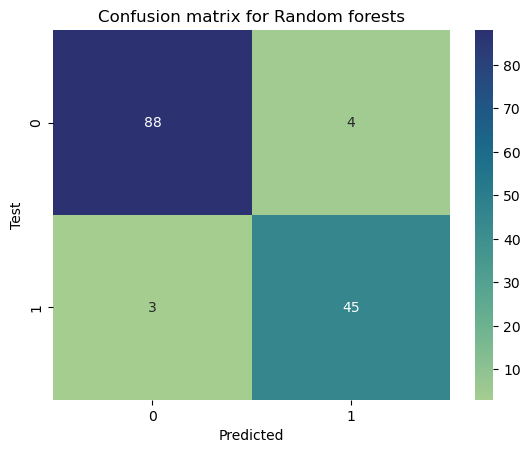

In [17]:
# Random forest classifiers trains the given data and the number of trees in the forest is specified 
randomforest_model = RandomForestClassifier(n_estimators = 120).fit(X_train, Y_train)

#calculates accuracy score on training data 
randomforest_model.score(X_train, Y_train)

#calculates accuracy score on test data 
randomforest_model.score(X_test, Y_test)

#produces prediction for the given model 
Y_pred = randomforest_model.predict(X_test)
print(f"Prediction:\n {Y_pred}")

#confusion matrix
print(f"Confusion Matrix:\n {confusion_matrix(Y_test,Y_pred)}")

#classification Report
print(f"Classification Report \n{classification_report(Y_test,Y_pred)}")

#Accuracy of the model 
accuracy = accuracy_score(Y_test, Y_pred)*100
print("Model Accuracy:", accuracy)

#precision of the model
precision = precision_score(Y_test, Y_pred)*100
print("Precision of model:", precision)

#Recall score of the model
recall = recall_score(Y_test, Y_pred)*100
print("Recall score of model:", recall)

#f1 score of the model 
f1 = f1_score(Y_test, Y_pred)*100
print("f1 score of model:", f1)

#plotting confusion matrix for decision tree method
sns.heatmap(confusion_matrix(Y_test,Y_pred),annot=True,cmap='crest')
plt.xlabel('Predicted')
plt.ylabel('Test')
plt.title('Confusion matrix for Random forests')
plt.show() 


results['Random Forest'] = [accuracy, precision, recall, f1]


# 3. Kernel SVM

Best kernel is rbf
Prediction:
 [0 0 0 0 0 1 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 1 1 1 0
 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0
 1 1 1 0 0 1 1 0 1 1 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 1 0
 1 1 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0]
Confusion Matrix:
 [[87  5]
 [ 1 47]]
Classification Report 
               precision    recall  f1-score   support

           0       0.99      0.95      0.97        92
           1       0.90      0.98      0.94        48

    accuracy                           0.96       140
   macro avg       0.95      0.96      0.95       140
weighted avg       0.96      0.96      0.96       140

 Model Accuracy: 95.71428571428572
Precision of model: 90.38461538461539
Recall score of model: 97.91666666666666
f1 score of model: 94.0


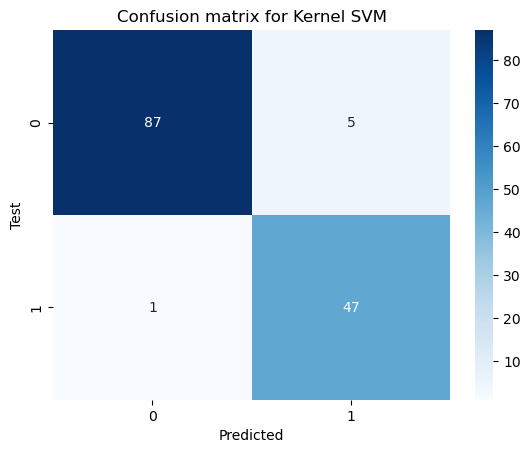

In [18]:
#creates a svm classifier
svm = SVC()

#defining the grid of hyperparameters and their values 
parameter_grid = {'kernel': ['linear', 'poly', 'sigmoid', 'rbf']}

#evaluation metrics that will be used in the model
score = ['accuracy', 'recall', 'precision', 'f1']

#GridSearchCV object
gridsearch = GridSearchCV(svm, parameter_grid, scoring = score, refit='f1')

#fitting the GridSearchCV object into the training data
gridsearch.fit(X_train, Y_train) 

#finding the best hyperparameter and creating a new classifier with the best hyperparameter 
print("Best kernel is {}".format(gridsearch.best_params_['kernel'])) 

best_parameter = gridsearch.best_params_
best_classifier = SVC(**best_parameter) 

#fiiting the new classifiers into the training data 
best_classifier.fit(X_train, Y_train) 

#produces predictions for the model
Y_pred = best_classifier.predict(X_test)

#prediction
print(f"Prediction:\n {Y_pred}")

#confusion matrix
print(f"Confusion Matrix:\n {confusion_matrix(Y_test,Y_pred)}")

#classification Report
print(f"Classification Report \n {classification_report(Y_test,Y_pred)}")

#Accuracy of the model 
accuracy = accuracy_score(Y_test, Y_pred)*100
print(f" Model Accuracy:", accuracy)

#precision of the model
precision = precision_score(Y_test, Y_pred)*100
print("Precision of model:", precision)

#Recall score of the model
recall = recall_score(Y_test, Y_pred)*100
print("Recall score of model:", recall)

#f1 score of the model 
f1 = f1_score(Y_test, Y_pred)*100
print("f1 score of model:", f1)

#plotting confusion matrix for decision tree method
sns.heatmap(confusion_matrix(Y_test,Y_pred),annot=True,cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Test')
plt.title('Confusion matrix for Kernel SVM')
plt.show() 


results['SVM'] = [accuracy, precision, recall, f1]

Classifer Performance table
   Classifier:         DT  Random Forest        SVM
0   Accuracy:  95.000000      95.000000  95.714286
1  Precision:  93.617021      91.836735  90.384615
2     Recall:  91.666667      93.750000  97.916667
3         F1:  92.631579      92.783505  94.000000


<Figure size 3000x2000 with 0 Axes>

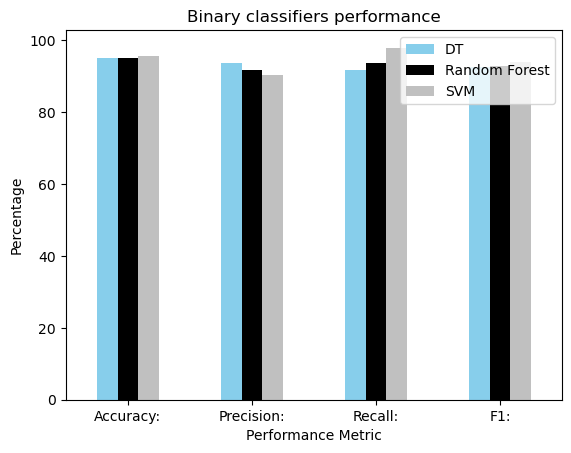

In [19]:
#printing the results of all classifiers by loading into a dataframe
results_df = pd.DataFrame.from_dict(results)
print("Classifer Performance table\n",results_df)
results_df.set_index('Classifier:', inplace=True)

#defining custom colors for the graph
colors = ['skyblue', 'black', 'silver']

#plotting the results of the graph 
fig = plt.figure(figsize=(30, 20))
ax = results_df.plot(kind='bar',rot = 0, color = colors)

# Set the axis labels and title
ax.set_xlabel('Performance Metric')
ax.set_ylabel('Percentage')
ax.set_title('Binary classifiers performance')

# Show the plot
plt.show()